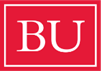 
<div style="text-align: center"> <h1>Assignment - 1</div>


<div style="text-align: center"> <h3>AD654 A3 Marketing Analytics (Spring 2024)</div>


<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


#### Solution - 1: Exploratory Data Analysis

##### Solution - 1 a]

In [5]:
!pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
!pip install yfinance
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
        # yf.pdr_override()  # Uncomment if necessary
        df = yf.download(ticker, start=start_date, end=end_date)
        # Alternatively: df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace=True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('Read', num_lines, 'lines of data for ticker:', ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker = "META"
    start_date = '2019-01-01'
    end_date = '2023-12-31'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, f'{ticker}.csv')
    df = get_stock(ticker, start_date, end_date, s_window=14, l_window=50)
    if df is not None:
        df.to_csv(output_file, index=False)
        print(f'Wrote {len(df)} lines to file: {output_file}')
except Exception as e:
    print(e)
    print('Failed to get Yahoo stock data for ticker:', ticker)


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 4.5 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 6.6 MB/s eta 0:00:01
     -------------------- ------------------- 1.5/3.0 MB 10.6 MB/s eta 0:00:01
     ------------------------------------ --- 2.7/3.0 MB 

[*********************100%***********************]  1 of 1 completed


Read 1258 lines of data for ticker: META
Wrote 1258 lines to file: C:\Users\asusw\Desktop\BU MET\BU SEM 3\DSwP\Assignments DSwP\META.csv


In [9]:
import os

ticker='META'
input_dir = r'C:\Users\asusw\Desktop\BU MET\BU SEM 3\DSwP\Assignments DSwP'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    """    your code for assignment 1 goes here
    """
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)


opened file for ticker:  META


> **💡Interpretation of Code💡-**
>
> Calling the 'str()' function would display the structure of the dataset, including information about the variables (columns) and observations (rows). 
>
> It provides a concise summary of the structure of the  object. 
>
> It displays  the data type and first few values of each variable.
>
> From the provided output of 'str(cv)' we can see that dataframe contains 784225 observations and 22 varaibles.

#### Solution - 2 a]

#### Solution - 2 b]

> **💡Interpretation of Results💡-**
>
> After filtering the dataframe for Ward = 13, resulting dataset contains 8234 observations and 22 variables.
> The three interesting facts about Ward 13 in Chicago are -
>
> Ward 13, also known as the 'Near West Side', is home to the historic University of Illinois at Chicago (UIC) campus, which plays a significant role in shaping the cultural and educational landscape  of the area.
>
> Ward 13 is known for its diverse population and vibrant neighborhoods, including the bustling Greek Town, Little Italy, and the developing West Loop area, which has seen rapid growth in recent years with the emergence of trendy restaurants, art galleries, and tech startups.
>
> Ward 13 is also home to important cultural landmarks such as the United Center, where the Chicago Bulls and Chicago Blasckhawks play, and the historic Maxwell Street Market, known for its rich history as a vibrant marketplace for food, music, and commerce.


#### Solution - 4 a]

> **💡Interpretation of Results💡-**
>
> Yes, there are NA values in my data df2. I checked this by "View(df2)" function in the RStudio. From the output that was delivered we can see that, there are 61822 NAs in the dataframe.

#### Solution - 4 b]

> **💡Interpretation of Results💡-**
>
> 65.86106% of data is complete case. A complete case in a data frame refers to a row that contains no missing values across all its variables. In other words, a complete case is a row where every variable has a non-missing (non-NA) value.

#### Solution - 4 c]

#### Solution - 4 d]

> **💡Interpretation of Results💡-**
>
> The total number of NA values in my dataset are 61946 

#### Solution - 4 e]

> **💡Interpretation of Results💡-**
>
> 64.37% percentage of rows in the dataframe are complete cases

#### Solution - 4 f]

Ward represent different sections of Chicago, which suggests that it is categorical rather than numeric. Each ward is a distinct category or group, and there is no inherent order or numerical relationship between the wards.

#### Solution - 6 b]

> **💡Interpretation of Results💡-**
> 
> Correlation of 0.1589375 suggests a weak positive correlation between "imposed fine" & "admin costs". This means that there is some tendency for them to increase together, but the relationship is not strong. Other factos may have a more significant influence on admin costs than imposed fines alone.

#### Solution - 6 c]

> **💡Interpretation of Graphs💡-**
>
> In 'Default' CASE.DISTRIBUTION most city delays fall within the range of approximately 0 to 500. This suggests that for cases with a 'Default' disposition, the time between the violation data and the hearing date tends to be relatively short, with most cases being resolved or addressed within this timeframe. 
>
> 'Liable' CASE.DISTRIBUTION is bell-shaped with the peak occuring around a city delay of approximately 600. This indicates that for cases where the disposition is 'Liable', there is a broader range of city delays, with a signifuicant number of cases having longer delays before the hearing date compared to other dispositions.
>
> 'Non-Suit' CASE.DISTRIBUTION exhibit unusual pattern. Most frequencies are extreme negative values, which could imply an outlier. 
>
> 'Not Liable' CASE.DISTRIBUTION, frequencies are concentrated between 0 and about 400 with a peak around 200. This indicates that for cases with a 'Not Liable' disposition, the city delays are generally shorter compared to 'Liable' cases, with a peak occurring around a delay of 200. This suggests that these cases tend to be resolved or adderessed relatively quickly.

#### Solution - 12

> **💡Interpretation of Code💡-**
>
> In the enviornment of R programming language, the code aims to filter the dataset `df5_filtered` to retain only rows with the top 5 most common Violation Descriptionss.
>
> We first pull up the library `dplyr` & `forcats`. Then we count the occurance of each Violation Description in the dataset and identify  the top 5 most common description using `count`, `arrange`, `head` and `pull` functions.
>
> Next, we filter the dataset `df5_filtered` to keep only rows with top 5 Violation Descriptions using `filter` functionn from `dplyr`. After filtering, we attempt to convert the `VIOLATION.DESCRIPTION` coloumn into a factor with explicit NA using `forcats::fct_explicit_na`. Howerver, still a warning messege is generated indicating that the it still contains NA values.

#### Solution - 14 a]

> **💡Interpretation of Code & Graph💡-**
>
> Using `leaflet`, `dplyr` and `ggplot2` this graph was generated.
>
> We calculate the mean imposed fine for wach if the top 5 violaiton descriptions (`shortened_description`) from the `df` dataset. Thisis achieved by grouping the data by `shortened_desccription` and summarizing the mean imposed fine for rach group using `summarise()` function.
>
> The resulting barplot visually represents the mean imposed fine for each of the top five violation descriptions. It helps in understanding the variations in fines imposed for different types of violations.
>
> We noticed that in the graph 'Inspection Arrangement' & 'Work Descrition' have higher fines ccompared to others. This could be because of multiple reasons such as:-
>
> 1. They tend to have more severe infractions or violations of regulations compared to other type of violations.
>
> 2. They occur more frequently or are more commonly reported, leading to increased scrutiny and enforcement by regulatory athorities.
>
> NOTE - The warning message "Removed 1 rows containing missing values (position_stack)" indicates that during the creation of the barplot, one row was removed due to missing values. This typically occurs when there are NA (missing) values present in the dataset used for plotting. As a result the ggplot2 removed this row from the plot to avoid errors or inconsistencies in the visualization.

#### Solution - 16